In [100]:
from IPython import get_ipython

if get_ipython():
    get_ipython().run_line_magic("load_ext", "autoreload")
    get_ipython().run_line_magic("autoreload", "2")

import pandas as pd
import latenta as la
import lacell as lac
import latenta_manuscript as lam
import laflow as laf
import numpy as np
import scanpy as sc
import torch

import seaborn as sns
import matplotlib.pyplot as plt
lam.set_matplotlib_style()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
cells = la.Dim(10, "cell")

In [102]:
y_value = pd.Series(np.random.normal(-1, 0.5, len(cells)), index = cells.index)

In [103]:
mu_p = la.distributions.Normal(1., 1.)
mu = la.Latent(mu_p)

In [104]:
mu.q = la.distributions.Delta(mu.q.loc)

In [105]:
mu.q.loc.loader.value

tensor(1., requires_grad=True)

In [106]:
mu.q.scale.run()
mu.q.scale.value

AttributeError: 'Delta' object has no attribute 'scale'

In [107]:
y_p = la.distributions.Normal(mu, 0.5)

In [108]:
y = la.Observation(y_value, y_p, label = "y")

In [109]:
y.plot()

In [38]:
mu.reset()

??: q, p ↦ Latent [] ~ Normal

In [40]:
latent.q.run()

In [41]:
latent.q.value

tensor(1.1144, grad_fn=<AddBackward0>)

In [44]:
latent.q.likelihood

tensor(0.2104, grad_fn=<SubBackward0>)

In [42]:
latent.p.run()

In [43]:
latent.p.log_prob(latent.q.value)

tensor(-0.9255, grad_fn=<SubBackward0>)

In [ ]:
latent.q.scale.run()
latent.q.scale.value_pd

In [18]:
posterior_p = la.posterior.Posterior(latent.p)
posterior_p.sample(100)

  0%|          | 0/100 [00:00<?, ?it/s]

<AxesSubplot:ylabel='Count'>

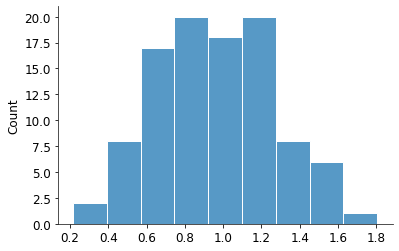

In [19]:
sns.histplot(posterior.samples[latent].to_pandas())

In [14]:
posterior = la.posterior.Posterior(latent)
posterior.sample(100)

  0%|          | 0/100 [00:00<?, ?it/s]

<AxesSubplot:ylabel='Count'>

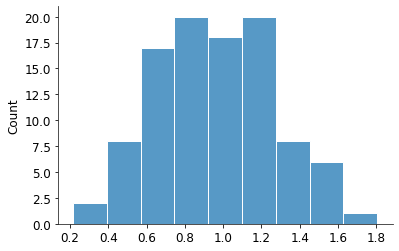

In [17]:
sns.histplot(posterior.samples[latent].to_pandas())